In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import mediapipe as mp

2025-02-27 12:31:11.982544: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-27 12:31:14.897013: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-27 12:31:14.923219: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-27 12:31:43.958047: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
vidcap = cv2.VideoCapture('./test.mov')
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles
success, image = vidcap.read()

In [3]:
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  plt.imshow(img)
  return img

Help on class FaceMesh in module mediapipe.python.solutions.face_mesh:

class FaceMesh(mediapipe.python.solution_base.SolutionBase)
 |  FaceMesh(static_image_mode=False, max_num_faces=1, refine_landmarks=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Face Mesh.
 |  
 |  MediaPipe Face Mesh processes an RGB image and returns the face landmarks on
 |  each detected face.
 |  
 |  Please refer to https://solutions.mediapipe.dev/face_mesh#python-solution-api
 |  for usage examples.
 |  
 |  Method resolution order:
 |      FaceMesh
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, max_num_faces=1, refine_landmarks=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe Face Mesh object.
 |      
 |      Args:
 |        static_image_mode: Whether to treat the input images as a batch of static
 |          and

(720, 1280, 3)


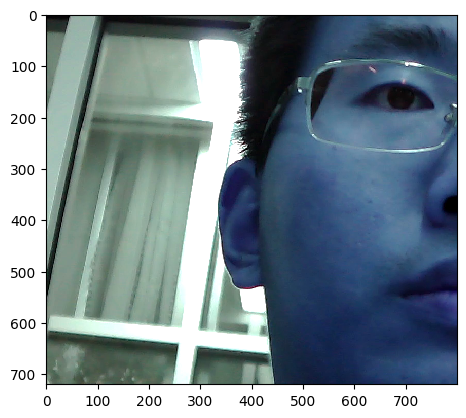

In [4]:
img = image[:,:800,]
print(image.shape)
plt.imshow(img)

I0000 00:00:1724083337.207489 3916814 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1724083337.220136 3918877 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 525.147.05), renderer: NVIDIA GeForce RTX 4090/PCIe/SSE2


478

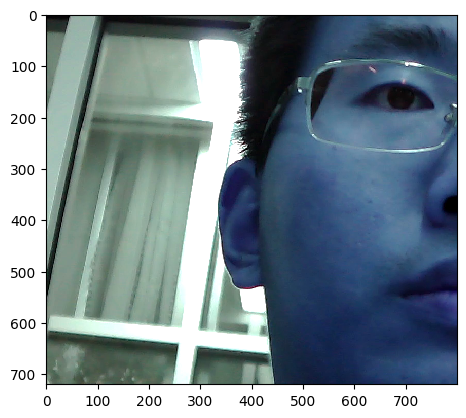

In [7]:
plt.imshow(img)
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,
    max_num_faces=2,
    min_detection_confidence=0.5) 

results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
len(results.multi_face_landmarks[0].landmark)


landmark {
  x: 0.6689050197601318
  y: 0.6720122694969177
  z: -0.10347431153059006
}
landmark {
  x: 0.6745362281799316
  y: 0.48050352931022644
  z: -0.13345320522785187
}
landmark {
  x: 0.6648624539375305
  y: 0.5565683841705322
  z: -0.08469860255718231
}
landmark {
  x: 0.6571729779243469
  y: 0.34491634368896484
  z: -0.08008871227502823
}
landmark {
  x: 0.6777485609054565
  y: 0.4320598244667053
  z: -0.1352829784154892
}
landmark {
  x: 0.6793882250785828
  y: 0.38006341457366943
  z: -0.11649816483259201
}
landmark {
  x: 0.6810550093650818
  y: 0.26451462507247925
  z: -0.02393963932991028
}
landmark {
  x: 0.49455833435058594
  y: 0.23950359225273132
  z: 0.05384182557463646
}
landmark {
  x: 0.6846656799316406
  y: 0.16762828826904297
  z: 0.011562523432075977
}
landmark {
  x: 0.6879065036773682
  y: 0.11063313484191895
  z: 0.01943334750831127
}
landmark {
  x: 0.6956576108932495
  y: -0.054553866386413574
  z: 0.08873669803142548
}
landmark {
  x: 0.6674880981445312
 

array([[[  6,   5,   7],
        [  6,   5,   7],
        [  6,   5,   7],
        ...,
        [110, 118,  94],
        [112, 118,  97],
        [165,  97,  88]],

       [[  6,   5,   7],
        [  6,   5,   7],
        [  6,   5,   7],
        ...,
        [103, 117,  96],
        [104, 117,  97],
        [186, 124, 117]],

       [[  7,   5,   8],
        [  8,   5,   8],
        [  6,   5,   7],
        ...,
        [ 97, 119,  95],
        [ 99, 119,  96],
        [201, 148, 136]],

       ...,

       [[156, 172, 157],
        [139, 155, 140],
        [119, 135, 120],
        ...,
        [167, 186, 168],
        [169, 180, 163],
        [227, 163, 158]],

       [[161, 177, 162],
        [168, 184, 169],
        [120, 136, 121],
        ...,
        [158, 181, 162],
        [167, 181, 163],
        [234, 175, 169]],

       [[168, 184, 169],
        [177, 193, 178],
        [153, 169, 154],
        ...,
        [153, 180, 160],
        [164, 181, 163],
        [247, 192, 186]]

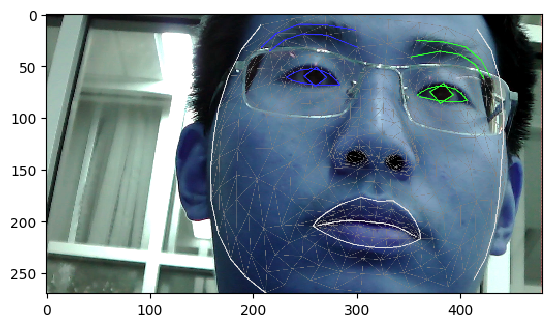

In [19]:
# Calculate landmarks number
len(results.multi_face_landmarks[0].landmark)
annotated_image = image.copy()
for face_landmarks in results.multi_face_landmarks:
    print(face_landmarks)
    mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
    mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
    mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
resize_and_show(annotated_image)

In [22]:
results.multi_face_landmarks[0].landmark[0].x

0.6689050197601318

In [25]:
mp_face_mesh.FACEMESH_IRISES

frozenset({(469, 470),
           (470, 471),
           (471, 472),
           (472, 469),
           (474, 475),
           (475, 476),
           (476, 477),
           (477, 474)})

I0000 00:00:1723463190.577758 2737268 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1723463190.590164 2739180 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 525.147.05), renderer: NVIDIA GeForce RTX 4090/PCIe/SSE2


Face landmarks of /home/yj167/rppg/frame1136.jpg:
Face landmarks of /home/yj167/rppg/frame28.jpg:
Face landmarks of /home/yj167/rppg/frame912.jpg:
Face landmarks of /home/yj167/rppg/frame118.jpg:
Face landmarks of /home/yj167/rppg/frame831.jpg:
Face landmarks of /home/yj167/rppg/frame1051.jpg:
Face landmarks of /home/yj167/rppg/frame1505.jpg:
Face landmarks of /home/yj167/rppg/frame1056.jpg:
Face landmarks of /home/yj167/rppg/frame700.jpg:
Face landmarks of /home/yj167/rppg/frame1125.jpg:
Face landmarks of /home/yj167/rppg/frame202.jpg:
Face landmarks of /home/yj167/rppg/frame534.jpg:
Face landmarks of /home/yj167/rppg/frame1395.jpg:
Face landmarks of /home/yj167/rppg/frame1179.jpg:
Face landmarks of /home/yj167/rppg/frame180.jpg:
Face landmarks of /home/yj167/rppg/frame609.jpg:
Face landmarks of /home/yj167/rppg/frame427.jpg:
Face landmarks of /home/yj167/rppg/frame510.jpg:
Face landmarks of /home/yj167/rppg/frame1100.jpg:
Face landmarks of /home/yj167/rppg/frame486.jpg:
Face landmark

Face landmarks of /home/yj167/rppg/frame494.jpg:
Face landmarks of /home/yj167/rppg/frame223.jpg:
Face landmarks of /home/yj167/rppg/frame1331.jpg:
Face landmarks of /home/yj167/rppg/frame881.jpg:
Face landmarks of /home/yj167/rppg/frame287.jpg:
Face landmarks of /home/yj167/rppg/frame1344.jpg:
Face landmarks of /home/yj167/rppg/frame282.jpg:
Face landmarks of /home/yj167/rppg/frame1362.jpg:
Face landmarks of /home/yj167/rppg/frame1372.jpg:
Face landmarks of /home/yj167/rppg/frame1357.jpg:
Face landmarks of /home/yj167/rppg/frame232.jpg:
Face landmarks of /home/yj167/rppg/frame832.jpg:
Face landmarks of /home/yj167/rppg/frame438.jpg:
Face landmarks of /home/yj167/rppg/frame1038.jpg:
Face landmarks of /home/yj167/rppg/frame903.jpg:
Face landmarks of /home/yj167/rppg/frame947.jpg:
Face landmarks of /home/yj167/rppg/frame580.jpg:
Face landmarks of /home/yj167/rppg/frame394.jpg:
Face landmarks of /home/yj167/rppg/frame1393.jpg:
Face landmarks of /home/yj167/rppg/frame413.jpg:
Face landmark

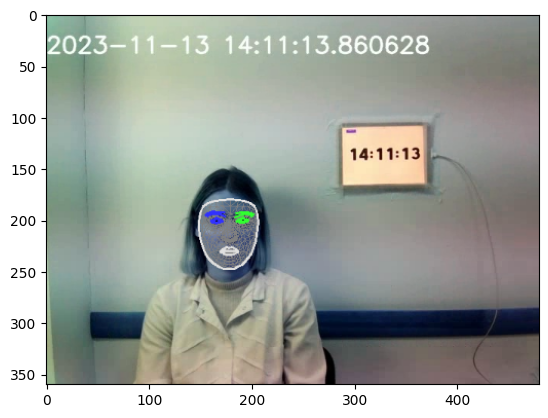

In [26]:
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,
    max_num_faces=2,
    min_detection_confidence=0.5) as face_mesh:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face landmarks of each face.
    print(f'Face landmarks of {name}:')
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    resize_and_show(annotated_image)

In [1]:
results

NameError: name 'results' is not defined

In [16]:
image_paths = []
folder_dir = "/home/yj167/rppg"
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
     if (images.endswith(".jpg")):
        image_paths.append(os.path.join(folder_dir, images))
    

In [18]:
images = {name: cv2.imread(name) for name in image_paths}
